# Upgraded Racing Game

In [1]:
import random
    
class Game:
    n_squares = 10
    winner = None

    def __init__(self, bots, verbose=False):
        self.bots = bots
        self.verbose = verbose

        self._set_starting_positions()  # calling the method that will reset all positions
        
    def _set_starting_positions(self):  
        for b in self.bots:  # go through every bot in the competition and set the position to 0
            b.position = 0
        
    def show_board(self):
        print("=" * 30)
        board = {i: [] for i in range(self.n_squares + 1)}
        for bot in self.bots:
            board[bot.position].append(bot)

        for square, bots_in_square in board.items():
            print(f"{square}: {bots_in_square}")

    def play_round(self):
        if self.winner is None:
            random.shuffle(self.bots)
            if self.verbose: 
                print(self.bots)
                
            for bot in self.bots:
                self._play_bot(bot)
                if self.winner:
                    break
                    
#             for bot in bots:
#                 bot.direction = 1

        if self.verbose:
            if self.winner:
                print(f"========== Race Over, WINNER: {self.winner} ========== ")
            self.show_board()

    def _play_bot(self, bot):
        bot_position_dictionary = {b.name: b.position for b in self.bots}
        
        action_str = bot.play(bot_position_dictionary)
        if action_str == "walk":
            pos_from, pos_to = bot.walk()
            if self.verbose: 
                print(f"{str(bot):<15} walked from {pos_from} to {pos_to}")
        elif action_str == "sabotage":
            sabotaged_bots = bot.sabotage(self.bots)
            if self.verbose: 
                print(f"{str(bot):<15} sabotaged {sabotaged_bots}")
        elif action_str == "faceforward":
            bot.direction = 1
            if self.verbose: 
                print(f"{str(bot):<15} faced forward")
            
        if bot.position >= self.n_squares:
            self.winner = bot
    
class Bot:
    position = 0
    direction = 1

    def __init__(self, name, strategy):
        self.name = name
        self.strategy = strategy

    def __repr__(self):
        return f"{self.name}"

    def walk(self):
        from_position = self.position
        self.position = max(0, self.position+self.direction)
        to_position = self.position
        return from_position, to_position

    def sabotage(self, bots):
        sabotaged_bots = []
        for bot in bots:
            if bot.position == self.position and bot != self:
                bot.direction *= -1
                sabotaged_bots.append(bot)
        return sabotaged_bots

    def play(self, bot_positions):
        return self.strategy(self, bot_positions)

### strategies

In [2]:
def random_strategy(self, bot_positions):
    return random.choice(["walk", "sabotage"])

In [3]:
original_list = ['walk', 'walk', 'sabotage']
current_list = []

def list_strategy(self, bot_positions):
    global current_list  # to allow "write-access" to out-of-function variables
    
    if current_list == []:
        current_list = original_list.copy()
    return current_list.pop(0)

In [4]:
def always_walk(self, bot_positions):
    return "walk"

In [5]:
def underdog(self, bot_positions):  
    my_pos = self.position
    bots_at_my_pos = sum([1 for pos in bot_positions.values() if pos == my_pos])
    if bots_at_my_pos > 2 and my_pos > 3:
        return "sabotage"
    else:
        if self.direction == 1:
            return "walk"
        else:
            return "faceforward"

In [6]:
bots = [
    Bot("Random", random_strategy),
    Bot("List", list_strategy),
    Bot("Walker", always_walk),
    Bot("UnderDog", underdog),
]

  0%|          | 0/1000 [00:00<?, ?it/s]

<AxesSubplot:>

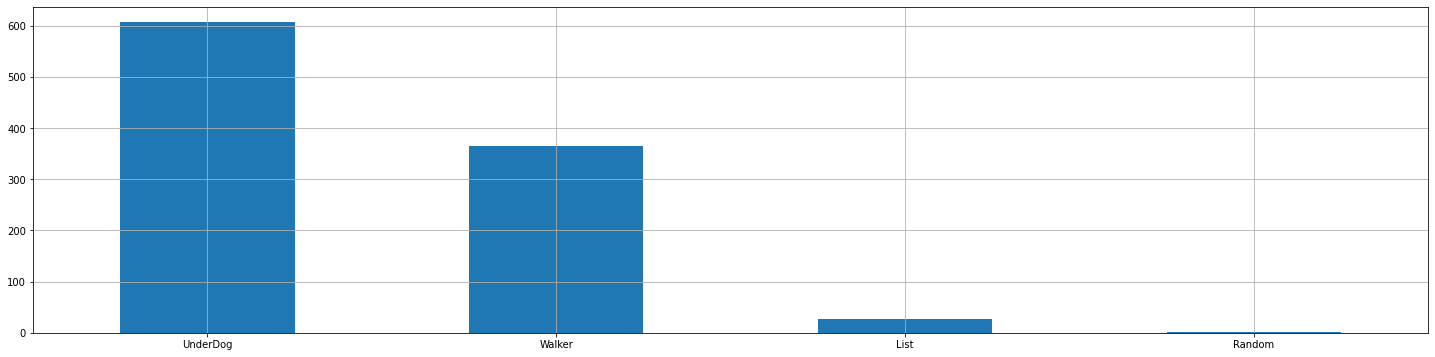

In [7]:
from tqdm.auto import tqdm
import pandas as pd

def grand_prix(n):
    winnings = {b: 0 for b in bots}
    for _ in tqdm(range(n)):
        game = Game(bots, verbose=False)
        while game.winner is None:
            game.play_round()
        winnings[game.winner] += 1
        
    return winnings

winnings = grand_prix(n=1000)
podium = pd.Series(winnings).sort_values(ascending=False)
podium.plot.bar(grid=True, figsize=(25,6), rot=0)